# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)

df.head()


,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the World Happiness Report data set.
2. I will be predicting the confidence of the citizens in the national government. The label is 'Confidence in national government'.
3. Since we have labeled data, this is a supervised learning problem. This is a regression problem since the 'Confidence in national government' is a continuous value between 0 and 1 based on the report.
4. My features are: 'Life Ladder', 'Log GDP per Capita', 'Social Support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Democractic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year', 'GINI index (World Bank estimate)', 'GINI index (World Bank estimate), average 2000-15', 'gini of household income reported in Gallup, by wp5-year'. 
5. An agency like the government or companies that deal closely with the government could benefit from what this model predicts. Signals of political instability can be detected along with policy satisfaction amongst the citizens. This prediction can be used to make important political as well as financial decisions. 

I have referenced Lab 6 and Unit 6 assignment for this assignment. I also used ChatGPT to cross-check whether my logic and flow of code was correct or not.  

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

        country  year  Life Ladder  Log GDP per capita  Social support  \
0   Afghanistan  2008     3.723590            7.168690        0.450662   
1   Afghanistan  2009     4.401778            7.333790        0.552308   
2   Afghanistan  2010     4.758381            7.386629        0.539075   
3   Afghanistan  2011     3.831719            7.415019        0.521104   
4   Afghanistan  2012     3.782938            7.517126        0.520637   
5   Afghanistan  2013     3.572100            7.503376        0.483552   
6   Afghanistan  2014     3.130896            7.484583        0.525568   
7   Afghanistan  2015     3.982855            7.466215        0.528597   
8   Afghanistan  2016     4.220169            7.461401        0.559072   
9   Afghanistan  2017     2.661718            7.460144        0.490880   
10      Albania  2007     4.634252            9.077325        0.821372   
11      Albania  2009     5.485470            9.161633        0.833047   
12      Albania  2010     5.268937    

<AxesSubplot: >

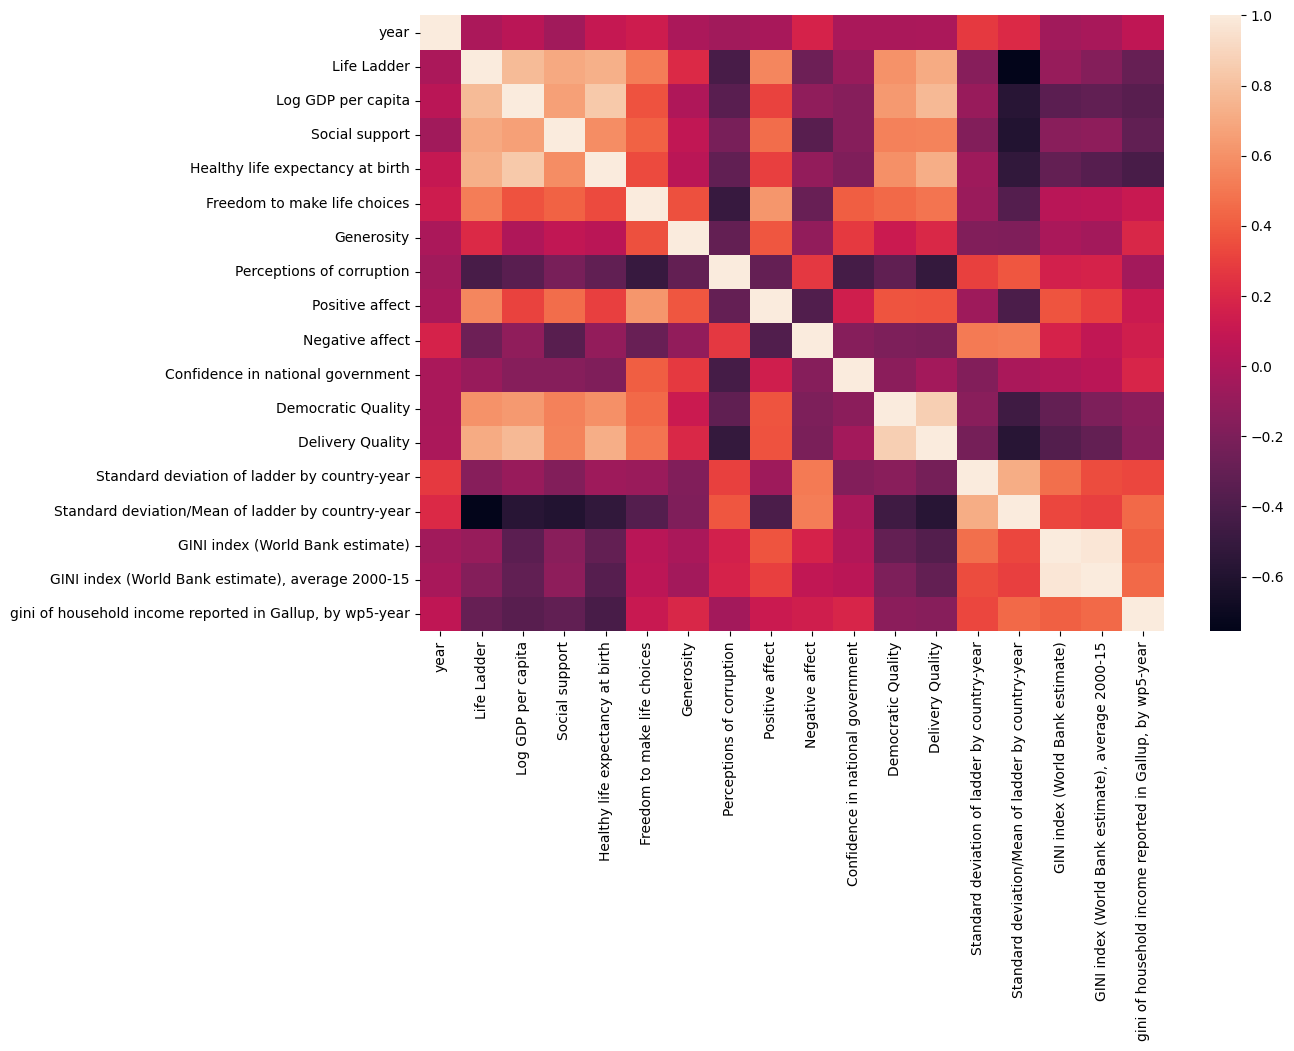

In [3]:
print(df.head(15))
df.dtypes
df.describe()
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

I chose to keep these features: 'Life Ladder', 'Log GDP per Capita', 'Social Support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Democractic Quality', 'Delivery Quality', 'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year'. Then, I will rename the columns names. I will scale the numerical data to normalize each column to have zero mean and unit standard deviation. After this, I will split the data where the test set is 30 percent of the size of the data set and the rest is training data. Then, I will train, test and evaluate two regression models: Linear Regression and Decision Tree, ensemble models: Gradient Boosted, Stacking, Random Forest.I will train, test and evaluate with hyperparameter tuning using GridSearchCV to improve the model performance. With that, I will use two metrics to evaluate our regressors: RMSE (root mean square error) and R2 (coefficient of determination). Lastly, I will visualize and compare model performance using a bar graph that shows the RMSE and R2 scores for each type of model. From this I will predict the best suited model for my problem.  



## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
# YOUR CODE HERE
features = ['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 
'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 
'Standard deviation of ladder by country-year', 'Standard deviation/Mean of ladder by country-year'] 

df = df[features]

df.columns

Index(['Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Confidence in national government',
       'Democratic Quality', 'Delivery Quality',
       'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year'],
      dtype='object')

In [5]:
new_names_dict = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative',
            'Confidence in national government': 'Confidence',
            'Democratic Quality': 'DemoQuality',
            'Delivery Quality': 'DeliQuality',
            'Standard deviation of ladder by country-year': 'Std_year',
            'Standard deviation/Mean of ladder by country-year': 'Std_mean'
                 }
df = df.rename(columns=new_names_dict)
df.columns

Index(['Happiness', 'LogGDP', 'Support', 'Life', 'Freedom', 'Generosity',
       'Corruption', 'Positive', 'Negative', 'Confidence', 'DemoQuality',
       'DeliQuality', 'Std_year', 'Std_mean'],
      dtype='object')

In [6]:
print(df.isnull().sum())

Happiness        0
LogGDP          27
Support         13
Life             9
Freedom         29
Generosity      80
Corruption      90
Positive        18
Negative        12
Confidence     161
DemoQuality    171
DeliQuality    171
Std_year         0
Std_mean         0
dtype: int64


In [7]:
df = df.dropna()

In [8]:
print(df.isnull().sum())

Happiness      0
LogGDP         0
Support        0
Life           0
Freedom        0
Generosity     0
Corruption     0
Positive       0
Negative       0
Confidence     0
DemoQuality    0
DeliQuality    0
Std_year       0
Std_mean       0
dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
new_scaled = df.select_dtypes(include='number')
transformed_data = scaler.fit_transform(new_scaled)
df_scaled = pd.DataFrame(transformed_data, columns = new_scaled.columns, index = new_scaled.index)
df_scaled

,Happiness,LogGDP,Support,Life,Freedom,Generosity,Corruption,Positive,Negative,Confidence,DemoQuality,DeliQuality,Std_year,Std_mean
0,-1.471350,-1.662495,-2.926820,-1.507976,-0.051253,1.074086,0.655655,-1.802994,-0.007679,0.705896,-2.196338,-1.691579,-0.541285,0.797569
1,-0.881257,-1.524562,-2.098437,-1.458511,-0.325168,1.206990,0.482412,-1.190997,-0.280422,0.703132,-2.330423,-1.671364,-0.680189,0.065621
2,-0.570976,-1.480418,-2.206283,-1.412653,-0.875327,0.804624,-0.301779,-0.873960,0.213693,-0.934426,-2.269145,-1.653376,-0.263447,0.095169
3,-1.377266,-1.456700,-2.352747,-1.369918,-1.603287,1.034509,-0.168539,-0.937462,0.108371,-0.892314,-2.183831,-1.652414,-0.512695,0.706052
4,-1.419711,-1.371394,-2.356551,-1.329136,-1.358596,1.472522,0.075095,-0.023484,0.117993,-0.220614,-2.094729,-1.438622,-0.478156,0.786982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,-0.399810,-1.356942,0.706422,-1.693408,-1.787468,-0.479032,0.529786,-0.402989,-1.053060,-0.369355,-1.253581,-1.591451,-0.331402,-0.083488
1557,-0.630311,-1.331269,-0.085746,-1.538973,-1.044651,-0.502437,0.377874,-0.009629,-0.988735,0.263619,-1.137279,-1.561816,-0.033118,0.302251
1558,-1.070354,-1.333275,-0.358230,-1.407611,-0.582633,-0.314432,0.319201,0.113421,-0.254336,0.465323,-1.089439,-1.519233,0.272737,0.971878
1559,-1.489098,-1.338873,-0.603036,-1.303330,-0.406908,-0.611400,0.265780,0.019853,-1.033023,0.590183,-0.981390,-1.391696,0.592421,1.803772


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [20]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:

X = df.drop(columns = 'Confidence', axis = 1) 
y = df['Confidence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_lr_pred = lr_model.predict(X_test)

In [25]:
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared = False)

lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.13446162966458686
[LR] R2: 0.5213619222103714


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [25, 50]
}

In [28]:
print('Running Grid Search...')
regressor =  DecisionTreeRegressor()
tree_grid = GridSearchCV(regressor, param_grid, cv = 5, scoring='neg_root_mean_squared_error')
tree_grid_search = tree_grid.fit(X_train, y_train) 
print('Done')

Running Grid Search...
Done


In [29]:
rmse_DT = -1 * tree_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT) )

[DT] RMSE for the best model is : 0.14


In [30]:
tree_best_params = tree_grid_search.best_params_
tree_best_params

{'max_depth': 10, 'min_samples_leaf': 25}

In [34]:
# YOUR CODE HERE
tree_model = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 25)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=25)

In [33]:
y_tree_pred = dt_model.predict(X_test)
tree_rmse = mean_squared_error(y_test, y_tree_pred, squared = False)
tree_r2 = r2_score(y_test, y_tree_pred)
print('[DT] Root Mean Squared Error: {0}'.format(tree_rmse))
print('[DT] R2: {0}'.format(tree_r2))

[DT] Root Mean Squared Error: 0.1391981204227578
[DT] R2: 0.48704738667719194


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
from sklearn.ensemble import StackingRegressor

In [36]:
estimators = [("DT", DecisionTreeRegressor(max_depth=10, min_samples_leaf=25)),
              ("LR", LinearRegression())
             ]

In [37]:
print('Implement Stacking...')
stacking_model = StackingRegressor(estimators = estimators, passthrough=False)
stacking_model.fit(X_train, y_train)
print('End')

Implement Stacking...
End


In [38]:
stacking_pred = stacking_model.predict(X_test)
stack_rmse = mean_squared_error(y_test, stacking_pred, squared = False)
stack_r2 = r2_score(y_test, stacking_pred)   
print('Root Mean Squared Error: {0}'.format(stack_rmse))
print('R2: {0}'.format(stack_r2))                  

Root Mean Squared Error: 0.12686383080354918
R2: 0.5739249072881067


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

In [40]:
# YOUR CODE HERE
param_grid = {
    'max_depth': [5, 8, 16],
    'min_samples_leaf': [1, 5],
    'n_estimators': [50, 100, 150, 200, 300]
}


In [41]:
print('Running Grid Search...')
gbdt_regressor =   GradientBoostingRegressor()
gbdt_grid = GridSearchCV(gbdt_regressor, param_grid, cv = 3, scoring='neg_root_mean_squared_error')
gbdt_grid_search = gbdt_grid.fit(X_train, y_train) 
print('Done')

Running Grid Search...
Done


In [42]:
gbdt_best_params = gbdt_grid_search.best_params_
gbdt_best_params

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 150}

In [43]:
print('Begin GBDT Implementation...')
gbdt_model = GradientBoostingRegressor(max_depth=8, n_estimators = 150)
gbdt_model.fit(X_train, y_train)
print('End')

Begin GBDT Implementation...
End


In [44]:
y_gbdt_pred = gbdt_model.predict(X_test) 
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared = False)
gbdt_r2 = r2_score(y_test, y_gbdt_pred)
print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))                 

[GBDT] Root Mean Squared Error: 0.10420279919987803
[GBDT] R2: 0.7125453914760926


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
print('Begin RF Implementation...')
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
print('End')

Begin RF Implementation...
End


In [47]:
y_rf_pred = rf_model.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared = False)
rf_r2 = r2_score(y_test, y_rf_pred)
print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))                 

[RF] Root Mean Squared Error: 0.1074530144753665
[RF] R2: 0.6943335930956995


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


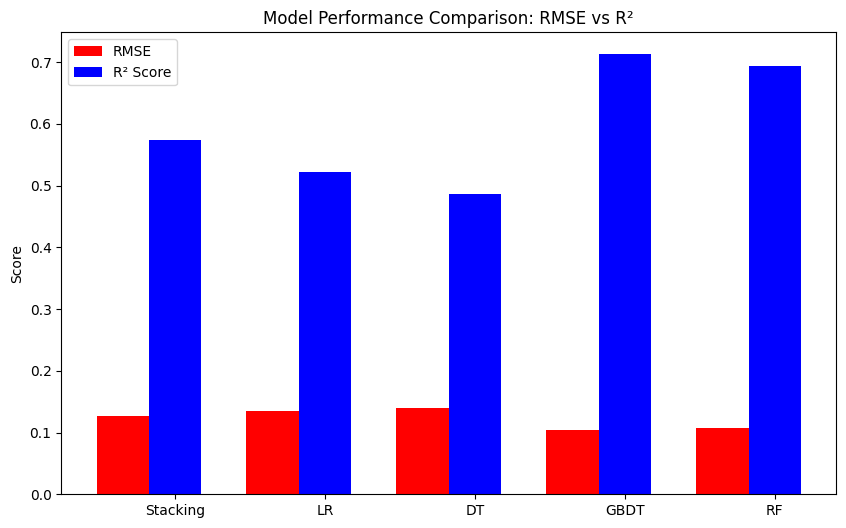

In [51]:
RMSE_Results = [stack_rmse, lr_rmse, tree_rmse, gbdt_rmse, rf_rmse]
R2_Results = [stack_r2, lr_r2, tree_r2, gbdt_r2, rf_r2]

x= np.arange(5)
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, RMSE_Results, width, label='RMSE', color='red')
plt.bar(x + width/2, R2_Results, width, label='R² Score', color='blue')

labels = ['Stacking','LR', 'DT', 'GBDT', 'RF']
plt.xticks(x + width/2, labels)
plt.ylabel("Score")
plt.title("Model Performance Comparison: RMSE vs R²")
plt.legend()
plt.show()

#Used ChatGPT and Lab 6 Assignment to produce the Model Performance Comparision. 

From this visual, Gradient-Boosted Decision Trees are best suited to predict the confidence of the citizens in their national government. 